In [1]:
# For a jupyter notebook add the following line:
%matplotlib inline

# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt

In [2]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.time import SimultaneousActivation #bisogna aggiungere advance agli agenti
from mesa.time import StagedActivation #dividere le azioni di un agenti (probabilmente inutile per noi)
from mesa.time import BaseScheduler
from mesa.datacollection import DataCollector

class MoneyAgent(Agent):
    """ An agent with fixed initial wealth."""
    def __init__(self, unique_id, model):
        super().__init__(unique_id, model)
        self.wealth = 1

    def step(self):
        k=1 #determine the standard amount of donation
        #print ("Hi, I am agent " + str(self.unique_id) +" and my previous wealth is " + str(self.wealth))
        if self.wealth == 0:#togliendo questo if si può fare debito?
            if self.model.cassacomune >0: #tassa redistributiva
                self.wealth +=1
                self.model.cassacomune -=1
            return
        #if self.wealth >= 4: #check the amount of wealth and increment donation tax
            #k=2
        if self.wealth > 4:
            self.wealth -= 1
            self.model.cassacomune =1
        other_agent = self.random.choice(self.model.schedule.agents)
        other_agent.wealth += k
        self.wealth -= k

class MoneyModel(Model):
    """A model with some number of agents."""
    def __init__(self, N):
        self.num_agents = N
        #self.schedule = BaseScheduler(self) #scegli il tipo di ordine di attivazione
        self.schedule = RandomActivation(self) #scegli il tipo di ordine di attivazione
        #self.schedule = SimultaneousActivation(self) #scegli il tipo di ordine di attivazione
        
        #Create cassa
        self.cassacomune=0
        # Create agents
        for i in range(self.num_agents):
            a = MoneyAgent(i, self)
            self.schedule.add(a)
            
    def step(self):
        '''Advance the model by one step.'''
        self.schedule.step()
        agent_wealth = [a.wealth for a in model.schedule.agents]
        #print(agent_wealth)
        

In [ ]:
model = MoneyModel(100)
for i in range(500):
    model.step()

In [98]:
agent_wealth = [a.wealth for a in model.schedule.agents]
agent_wealth

[4,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 3,
 0,
 1,
 1,
 5,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 4,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 3,
 0,
 1,
 0,
 1,
 3,
 1,
 1,
 1,
 0,
 3,
 0,
 1,
 0,
 5,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 1,
 1,
 4,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 1,
 5,
 1,
 1,
 0,
 0,
 0,
 4]

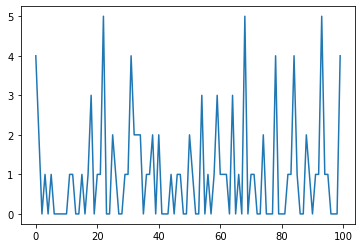

In [99]:
plt.plot(agent_wealth)

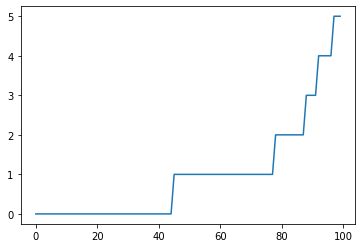

In [100]:
s_agent_wealth=agent_wealth.sort()
plt.plot(agent_wealth)

In [94]:
all_agent_wealth=[]
all_s_agent_wealth=[]

for j in range(500): #number of runs
    model = MoneyModel(100) #number of agents
    for i in range(500): #number of steps
        model.step()
    agent_wealth = [a.wealth for a in model.schedule.agents]
    #print('Final agent wealth is'+str(agent_wealth))
    all_agent_wealth.append(agent_wealth)
    b=sorted(agent_wealth)
    all_s_agent_wealth.append(b)
    
avg_agent_wealth=[0 for i in range(len(agent_wealth))]
avg_s_agent_wealth=[0 for i in range(len(agent_wealth))]


for k in range(len(all_agent_wealth)):
    for h in range(len(agent_wealth)):
        avg_agent_wealth[h] += all_agent_wealth[k][h]
for h in range(len(avg_agent_wealth)):
    avg_agent_wealth[h]=avg_agent_wealth[h]/len(all_agent_wealth)

for k in range(len(all_s_agent_wealth)):
    for h in range(len(agent_wealth)):
        avg_s_agent_wealth[h] += all_s_agent_wealth[k][h]
for h in range(len(avg_s_agent_wealth)):
    avg_s_agent_wealth[h]=avg_s_agent_wealth[h]/len(all_s_agent_wealth)

#print(all_agent_wealth, all_s_agent_wealth)
print(avg_agent_wealth, avg_s_agent_wealth)

[1.476, 1.366, 1.276, 1.328, 1.23, 1.406, 1.388, 1.284, 1.306, 1.332, 1.336, 1.226, 1.196, 1.202, 1.274, 1.304, 1.086, 1.26, 1.136, 1.148, 1.254, 1.324, 1.044, 1.202, 1.164, 1.14, 1.212, 1.228, 1.066, 1.206, 1.228, 1.068, 1.122, 1.086, 1.15, 1.084, 1.148, 1.07, 1.016, 1.092, 1.056, 1.004, 1.022, 1.048, 1.014, 0.972, 0.906, 0.946, 1.034, 0.996, 1.056, 1.114, 0.946, 0.956, 0.892, 0.926, 1.018, 0.848, 1.034, 0.982, 0.856, 0.862, 0.978, 0.868, 0.854, 0.94, 0.902, 0.734, 0.86, 0.908, 0.848, 0.822, 0.89, 0.804, 0.818, 0.828, 0.8, 0.856, 0.81, 0.834, 0.802, 0.778, 0.782, 0.772, 0.732, 0.79, 0.736, 0.82, 0.762, 0.732, 0.76, 0.736, 0.706, 0.616, 0.752, 0.706, 0.662, 0.616, 0.674, 0.76] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014, 0.018, 0.036, 0.06, 0.102, 0.164, 0.24, 0.334, 0.434, 0.528, 0.638, 0.764, 0.848, 0.902, 0.942, 0.968, 0.988, 0.992,

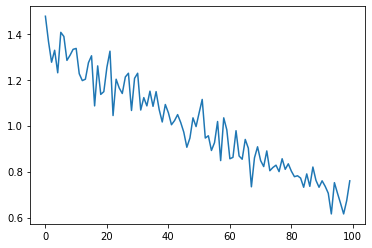

In [95]:
plt.plot(avg_agent_wealth) #basescheduler

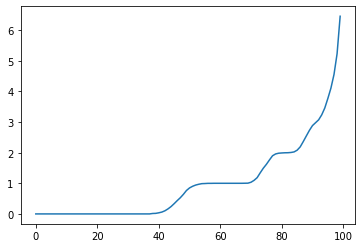

In [96]:
plt.plot(avg_s_agent_wealth)

In [105]:
all_agent_wealth=[]
all_s_agent_wealth=[]

for j in range(500):
    model = MoneyModel(100)
    for i in range(500):
        model.step()
    agent_wealth = [a.wealth for a in model.schedule.agents]
    #print('Final agent wealth is'+str(agent_wealth))
    all_agent_wealth.append(agent_wealth)
    b=sorted(agent_wealth)
    all_s_agent_wealth.append(b)
    
avg_agent_wealth=[0 for i in range(len(agent_wealth))]
avg_s_agent_wealth=[0 for i in range(len(agent_wealth))]


for k in range(len(all_agent_wealth)):
    for h in range(len(agent_wealth)):
        avg_agent_wealth[h] += all_agent_wealth[k][h]
for h in range(len(avg_agent_wealth)):
    avg_agent_wealth[h]=avg_agent_wealth[h]/len(all_agent_wealth)

for k in range(len(all_s_agent_wealth)):
    for h in range(len(agent_wealth)):
        avg_s_agent_wealth[h] += all_s_agent_wealth[k][h]
for h in range(len(avg_s_agent_wealth)):
    avg_s_agent_wealth[h]=avg_s_agent_wealth[h]/len(all_s_agent_wealth)

#print(all_agent_wealth, all_s_agent_wealth)
print(avg_agent_wealth, avg_s_agent_wealth)

[0.994, 0.968, 0.956, 0.966, 0.906, 0.952, 1.002, 0.972, 1.042, 0.98, 0.988, 1.014, 0.934, 0.928, 0.99, 1.054, 0.97, 1.01, 1.038, 0.958, 0.992, 1.052, 1.054, 0.994, 1.106, 0.982, 0.95, 1.068, 1.018, 0.984, 1.0, 0.872, 1.014, 0.968, 1.094, 1.008, 1.046, 0.978, 0.936, 1.03, 1.012, 1.086, 1.004, 1.13, 0.974, 1.012, 0.968, 1.018, 1.024, 1.01, 0.996, 1.046, 0.82, 1.026, 1.028, 0.946, 1.032, 1.06, 0.878, 1.034, 1.0, 0.98, 0.908, 0.996, 1.152, 1.054, 0.924, 1.08, 1.03, 0.938, 0.902, 1.072, 1.014, 0.996, 1.052, 1.096, 0.96, 1.0, 1.078, 1.03, 1.068, 0.956, 1.002, 1.146, 0.97, 1.038, 0.974, 0.972, 0.968, 0.836, 0.93, 1.112, 1.084, 0.948, 1.012, 0.912, 1.008, 1.012, 0.982, 0.936] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.002, 0.002, 0.004, 0.012, 0.028, 0.062, 0.092, 0.144, 0.252, 0.358, 0.456, 0.58, 0.696, 0.79, 0.862, 0.914, 0.948, 0.972, 0.992, 0.996, 0.996,

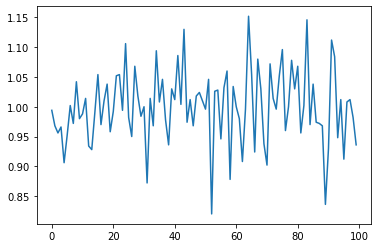

In [106]:
plt.plot(avg_agent_wealth) #random activation

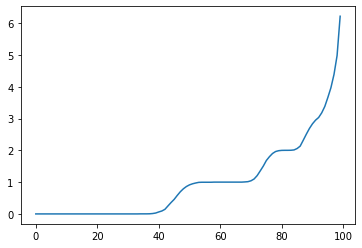

In [107]:
plt.plot(avg_s_agent_wealth)

queste due distribuzioni esponenziali sono davvero equivalentemente eque? o forse c'è motivo di crede che l'arancione sia più equa

In [121]:
all_agent_wealth=[]
all_s_agent_wealth=[]

for j in range(500):
    model = MoneyModel(100)
    for i in range(500):
        model.step()
    agent_wealth = [a.wealth for a in model.schedule.agents]
    #print('Final agent wealth is'+str(agent_wealth))
    all_agent_wealth.append(agent_wealth)
    b=sorted(agent_wealth)
    all_s_agent_wealth.append(b)
    
avg_agent_wealth=[0 for i in range(len(agent_wealth))]
avg_s_agent_wealth=[0 for i in range(len(agent_wealth))]


for k in range(len(all_agent_wealth)):
    for h in range(len(agent_wealth)):
        avg_agent_wealth[h] += all_agent_wealth[k][h]
for h in range(len(avg_agent_wealth)):
    avg_agent_wealth[h]=avg_agent_wealth[h]/len(all_agent_wealth)

for k in range(len(all_s_agent_wealth)):
    for h in range(len(agent_wealth)):
        avg_s_agent_wealth[h] += all_s_agent_wealth[k][h]
for h in range(len(avg_s_agent_wealth)):
    avg_s_agent_wealth[h]=avg_s_agent_wealth[h]/len(all_s_agent_wealth)

#print(all_agent_wealth, all_s_agent_wealth)
print(avg_agent_wealth, avg_s_agent_wealth)

[0.936, 0.96, 1.04, 1.032, 0.98, 0.958, 0.96, 0.968, 1.044, 0.978, 1.13, 0.922, 1.034, 0.984, 0.946, 1.008, 0.99, 1.062, 0.974, 0.996, 1.018, 1.004, 0.946, 0.974, 1.042, 0.972, 1.07, 0.984, 1.0, 0.964, 0.918, 1.068, 0.982, 0.966, 0.99, 1.07, 1.028, 1.006, 0.934, 0.98, 1.014, 1.002, 1.01, 1.026, 0.988, 0.98, 0.992, 0.994, 0.978, 1.018, 0.934, 1.02, 0.96, 0.984, 1.036, 0.966, 1.05, 1.058, 0.992, 1.012, 0.996, 0.976, 1.066, 0.96, 0.966, 0.988, 1.032, 1.11, 0.986, 1.014, 1.014, 1.048, 0.996, 1.06, 1.01, 1.056, 1.024, 0.942, 0.986, 0.984, 1.026, 1.012, 0.978, 1.024, 0.988, 1.034, 1.012, 1.008, 0.938, 1.022, 1.094, 0.946, 1.006, 0.97, 0.984, 0.918, 1.08, 0.962, 1.052, 0.9] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006, 0.012, 0.032, 0.05, 0.096, 0.162, 0.248, 0.33, 0.458, 0.584, 0.692, 0.796, 0.884, 0.942, 0.966, 0.982, 0.99, 0.998, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

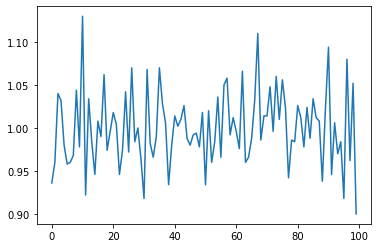

In [122]:
plt.plot(avg_agent_wealth) #random activation + k=2 donation tax

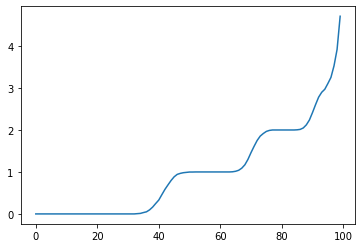

In [123]:
plt.plot(avg_s_agent_wealth)

In [165]:
all_agent_wealth=[]
all_s_agent_wealth=[]
bilanci_finali=[]

for j in range(500):
    bilanci_parziali=[]
    model = MoneyModel(100)
    for i in range(500):
        model.step()
        bilancio_parziale = model.cassacomune
        bilanci_parziali.append(bilancio_parziale)
    #print(bilanci_parziali)
    bilancio_finale = model.cassacomune
    bilanci_finali.append(bilancio_finale)
    agent_wealth = [a.wealth for a in model.schedule.agents]
    #print('Final agent wealth is'+str(agent_wealth))
    all_agent_wealth.append(agent_wealth)
    b=sorted(agent_wealth)
    all_s_agent_wealth.append(b)
#print(bilanci_finali)

    
avg_agent_wealth=[0 for i in range(len(agent_wealth))]
avg_s_agent_wealth=[0 for i in range(len(agent_wealth))]


for k in range(len(all_agent_wealth)):
    for h in range(len(agent_wealth)):
        avg_agent_wealth[h] += all_agent_wealth[k][h]
for h in range(len(avg_agent_wealth)):
    avg_agent_wealth[h]=avg_agent_wealth[h]/len(all_agent_wealth)

for k in range(len(all_s_agent_wealth)):
    for h in range(len(agent_wealth)):
        avg_s_agent_wealth[h] += all_s_agent_wealth[k][h]
for h in range(len(avg_s_agent_wealth)):
    avg_s_agent_wealth[h]=avg_s_agent_wealth[h]/len(all_s_agent_wealth)

#print(all_agent_wealth, all_s_agent_wealth)
print(avg_agent_wealth, avg_s_agent_wealth)

[0.72, 0.78, 0.874, 0.786, 0.794, 0.838, 0.774, 0.796, 0.798, 0.72, 0.782, 0.838, 0.83, 0.76, 0.788, 0.69, 0.852, 0.814, 0.82, 0.756, 0.776, 0.892, 0.784, 0.844, 0.788, 0.758, 0.788, 0.786, 0.762, 0.76, 0.716, 0.808, 0.742, 0.788, 0.748, 0.816, 0.796, 0.762, 0.798, 0.804, 0.842, 0.698, 0.774, 0.716, 0.778, 0.812, 0.766, 0.762, 0.694, 0.766, 0.802, 0.686, 0.724, 0.766, 0.818, 0.75, 0.816, 0.81, 0.808, 0.796, 0.716, 0.806, 0.764, 0.728, 0.808, 0.83, 0.74, 0.73, 0.846, 0.86, 0.766, 0.78, 0.772, 0.79, 0.816, 0.722, 0.81, 0.796, 0.806, 0.78, 0.746, 0.79, 0.774, 0.706, 0.8, 0.742, 0.834, 0.674, 0.802, 0.73, 0.798, 0.86, 0.858, 0.826, 0.728, 0.83, 0.812, 0.77, 0.708, 0.808] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.004, 0.006, 0.012, 0.034, 0.062, 0.112, 0.176, 0.28, 0.406, 0.534, 0.642, 0.76, 0.844, 0.912, 0.946, 0.978, 0.988,

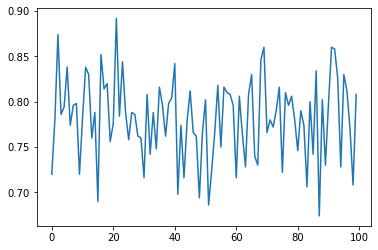

In [166]:
plt.plot(avg_agent_wealth) #random activation + red tax

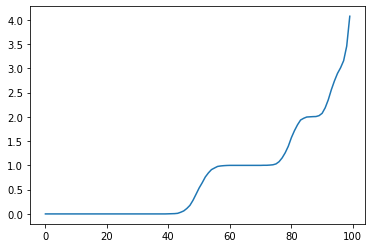

In [167]:
plt.plot(avg_s_agent_wealth)

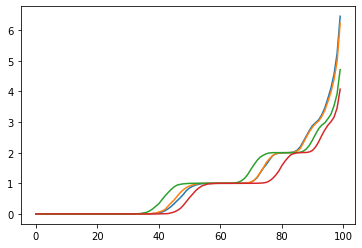

In [168]:
c=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.014, 0.018, 0.036, 0.06, 0.102, 0.164, 0.24, 0.334, 0.434, 0.528, 0.638, 0.764, 0.848, 0.902, 0.942, 0.968, 0.988, 0.992, 0.998, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.002, 1.004, 1.034, 1.096, 1.184, 1.342, 1.492, 1.618, 1.762, 1.898, 1.958, 1.982, 1.99, 1.996, 1.998, 2.006, 2.024, 2.08, 2.188, 2.362, 2.546, 2.728, 2.884, 2.978, 3.072, 3.234, 3.458, 3.77, 4.108, 4.554, 5.23, 6.454]
d=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.002, 0.002, 0.004, 0.012, 0.028, 0.062, 0.092, 0.144, 0.252, 0.358, 0.456, 0.58, 0.696, 0.79, 0.862, 0.914, 0.948, 0.972, 0.992, 0.996, 0.996, 0.996, 0.996, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.006, 1.014, 1.042, 1.098, 1.204, 1.352, 1.504, 1.68, 1.8, 1.9, 1.962, 1.988, 1.998, 2.0, 2.0, 2.002, 2.012, 2.056, 2.132, 2.318, 2.508, 2.686, 2.834, 2.948, 3.032, 3.178, 3.378, 3.662, 3.97, 4.388, 4.98, 6.216]
e=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006, 0.012, 0.032, 0.05, 0.096, 0.162, 0.248, 0.33, 0.458, 0.584, 0.692, 0.796, 0.884, 0.942, 0.966, 0.982, 0.99, 0.998, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.004, 1.016, 1.04, 1.09, 1.17, 1.298, 1.46, 1.61, 1.75, 1.854, 1.916, 1.966, 1.99, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.004, 2.014, 2.048, 2.122, 2.238, 2.414, 2.604, 2.782, 2.898, 2.97, 3.106, 3.252, 3.528, 3.92, 4.71]
f=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.004, 0.006, 0.012, 0.034, 0.062, 0.112, 0.176, 0.28, 0.406, 0.534, 0.642, 0.76, 0.844, 0.912, 0.946, 0.978, 0.988, 0.994, 0.998, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.002, 1.002, 1.006, 1.012, 1.03, 1.076, 1.154, 1.26, 1.394, 1.57, 1.714, 1.836, 1.934, 1.97, 1.996, 2.0, 2.004, 2.006, 2.024, 2.072, 2.186, 2.35, 2.558, 2.738, 2.894, 3.01, 3.156, 3.456, 4.072]
plt.plot(c) # sorted average distribution of the wealth under no tax and baseschedular
plt.plot(d) # sorted average distribution of the wealth under no tax and randomactivation
plt.plot(e) # sorted average distribution of the wealth under k=2 donation tax (over 4) and randomactivation
plt.plot(f) # sorted average distribution of the wealth under red=1 tax (over 4) and randomactivation

WTF?!

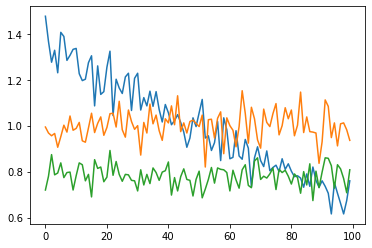

In [169]:
a=[1.476, 1.366, 1.276, 1.328, 1.23, 1.406, 1.388, 1.284, 1.306, 1.332, 1.336, 1.226, 1.196, 1.202, 1.274, 1.304, 1.086, 1.26, 1.136, 1.148, 1.254, 1.324, 1.044, 1.202, 1.164, 1.14, 1.212, 1.228, 1.066, 1.206, 1.228, 1.068, 1.122, 1.086, 1.15, 1.084, 1.148, 1.07, 1.016, 1.092, 1.056, 1.004, 1.022, 1.048, 1.014, 0.972, 0.906, 0.946, 1.034, 0.996, 1.056, 1.114, 0.946, 0.956, 0.892, 0.926, 1.018, 0.848, 1.034, 0.982, 0.856, 0.862, 0.978, 0.868, 0.854, 0.94, 0.902, 0.734, 0.86, 0.908, 0.848, 0.822, 0.89, 0.804, 0.818, 0.828, 0.8, 0.856, 0.81, 0.834, 0.802, 0.778, 0.782, 0.772, 0.732, 0.79, 0.736, 0.82, 0.762, 0.732, 0.76, 0.736, 0.706, 0.616, 0.752, 0.706, 0.662, 0.616, 0.674, 0.76]
b=[0.994, 0.968, 0.956, 0.966, 0.906, 0.952, 1.002, 0.972, 1.042, 0.98, 0.988, 1.014, 0.934, 0.928, 0.99, 1.054, 0.97, 1.01, 1.038, 0.958, 0.992, 1.052, 1.054, 0.994, 1.106, 0.982, 0.95, 1.068, 1.018, 0.984, 1.0, 0.872, 1.014, 0.968, 1.094, 1.008, 1.046, 0.978, 0.936, 1.03, 1.012, 1.086, 1.004, 1.13, 0.974, 1.012, 0.968, 1.018, 1.024, 1.01, 0.996, 1.046, 0.82, 1.026, 1.028, 0.946, 1.032, 1.06, 0.878, 1.034, 1.0, 0.98, 0.908, 0.996, 1.152, 1.054, 0.924, 1.08, 1.03, 0.938, 0.902, 1.072, 1.014, 0.996, 1.052, 1.096, 0.96, 1.0, 1.078, 1.03, 1.068, 0.956, 1.002, 1.146, 0.97, 1.038, 0.974, 0.972, 0.968, 0.836, 0.93, 1.112, 1.084, 0.948, 1.012, 0.912, 1.008, 1.012, 0.982, 0.936]
z=[0.72, 0.78, 0.874, 0.786, 0.794, 0.838, 0.774, 0.796, 0.798, 0.72, 0.782, 0.838, 0.83, 0.76, 0.788, 0.69, 0.852, 0.814, 0.82, 0.756, 0.776, 0.892, 0.784, 0.844, 0.788, 0.758, 0.788, 0.786, 0.762, 0.76, 0.716, 0.808, 0.742, 0.788, 0.748, 0.816, 0.796, 0.762, 0.798, 0.804, 0.842, 0.698, 0.774, 0.716, 0.778, 0.812, 0.766, 0.762, 0.694, 0.766, 0.802, 0.686, 0.724, 0.766, 0.818, 0.75, 0.816, 0.81, 0.808, 0.796, 0.716, 0.806, 0.764, 0.728, 0.808, 0.83, 0.74, 0.73, 0.846, 0.86, 0.766, 0.78, 0.772, 0.79, 0.816, 0.722, 0.81, 0.796, 0.806, 0.78, 0.746, 0.79, 0.774, 0.706, 0.8, 0.742, 0.834, 0.674, 0.802, 0.73, 0.798, 0.86, 0.858, 0.826, 0.728, 0.83, 0.812, 0.77, 0.708, 0.808]
plt.plot(a) #ordered distribution with base scheduler
plt.plot(b) #ordered distribution with random activation
plt.plot(z) #ordered distribution with random activation and red tax

La mia cassa perde soldi o li immagazzina e basta?